In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import time
from sklearn.exceptions import ConvergenceWarning

# import data processing libraries
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from category_encoders import TargetEncoder,JamesSteinEncoder

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,roc_curve,roc_auc_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn import tree



# import models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB

from sklearn_evaluation import plot
import graphviz

import warnings
warnings.filterwarnings('ignore')

from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore',category=ConvergenceWarning)


#intel sklearn extensions
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


### Introduction
We have 2 datasets one for training and the other one for testing the model. Lets load training dataset and do data analysis and model building on it.
The datasets are
* [Train Set](data/fraudTrain.csv)
* [Test Set](data/fraudTest.csv)

### Dataset


In [2]:
card_transaction_df = pd.read_csv('data/fraudTrain.csv')
card_transaction_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


### Data Understanding

In [3]:
card_transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

This dataset contains 1.3M rows with  22 features. The dataset contains object,float and int type features.

In [4]:
card_transaction_df.duplicated().sum()

0

This dataset doesnt contains any duplicated rows to remove.

In [5]:
card_transaction_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

This dataset also doesnt contains any nulls so we dont have to impute any features.

In [6]:
card_transaction_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.29668e+06,1.29668e+06,1.29668e+06,1.29668e+06,1.29668e+06,1.29668e+06,1.29668e+06,1.29668e+06,1.29668e+06,1.29668e+06,1.29668e+06
mean,648337,4.17192e+17,70.351,48800.7,38.5376,-90.2263,88824.4,1.34924e+09,38.5373,-90.2265,0.00578865
std,374318,1.30881e+18,160.316,26893.2,5.07581,13.7591,301956,1.28413e+07,5.10979,13.7711,0.0758627
min,0,6.04162e+10,1,1257,20.0271,-165.672,23,1.32538e+09,19.0278,-166.671,0
25%,324168,1.80043e+14,9.65,26237,34.6205,-96.798,743,1.33875e+09,34.7336,-96.8973,0
50%,648337,3.52142e+15,47.52,48174,39.3543,-87.4769,2456,1.34925e+09,39.3657,-87.4384,0
75%,972506,4.64226e+15,83.14,72042,41.9404,-80.158,20328,1.35939e+09,41.9572,-80.2368,0
max,1.29667e+06,4.99235e+18,28948.9,99783,66.6933,-67.9503,2.9067e+06,1.37182e+09,67.5103,-66.9509,1


In this dataset, the minimum transaction amount is $1 and the maximum is $28948.

In [7]:
card_transaction_df['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

This dataset has around 7500 fraud transactions and 1.28M non-fraud transactions.

### Data Analysis
Lets do some data analysis to understand how these features are related and what story they tell us.

#### Univariate Analysis

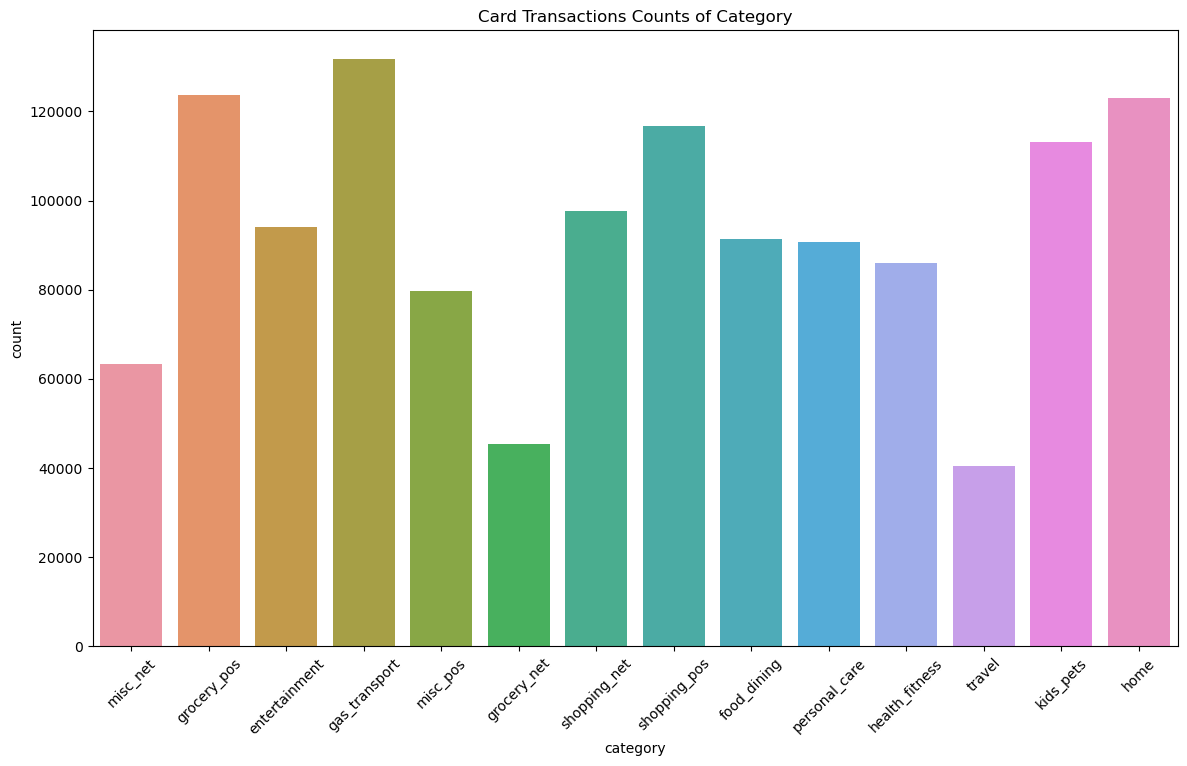

In [18]:
plt.figure(figsize=(14,8))
sns.countplot(card_transaction_df,x='category')
plt.xticks(rotation=45)
plt.title('Card Transactions Counts of Category')
plt.show()

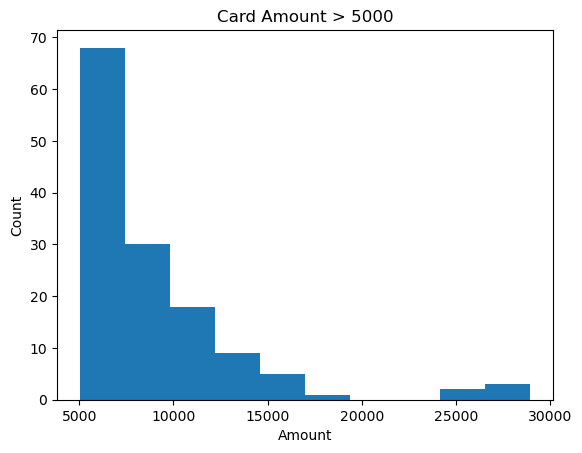

In [33]:
plt.title('Card Amount > 5000')
plt.hist(card_transaction_df.query("amt > 5000" )['amt'])
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

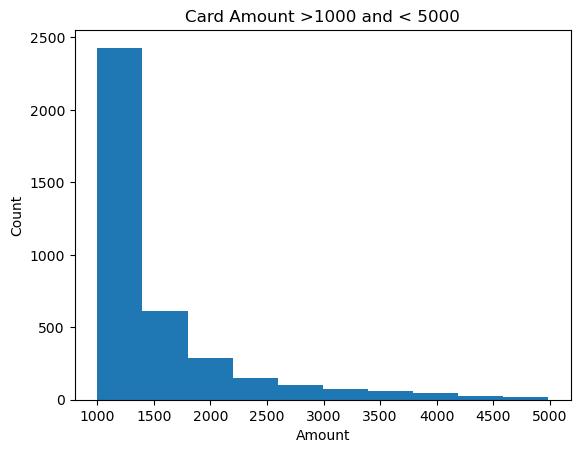

In [35]:
plt.title('Card Amount >1000 and < 5000')
plt.hist(card_transaction_df.query("amt < 5000 and amt > 1000" )['amt'])
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

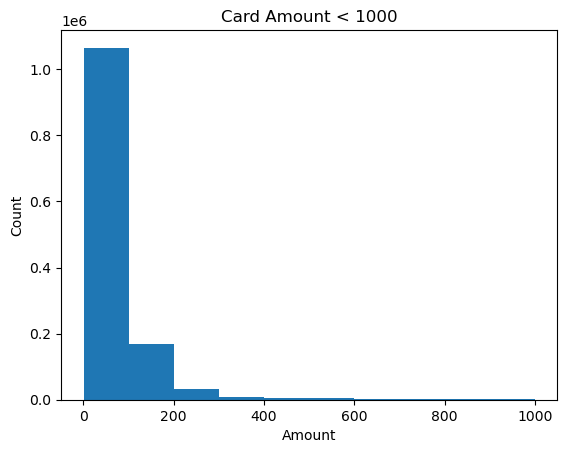

In [38]:
plt.title('Card Amount < 1000')
plt.hist(card_transaction_df.query("amt < 1000" )['amt'])
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

In [41]:
card_transaction_df['gender'].value_counts()

F    709863
M    586812
Name: gender, dtype: int64

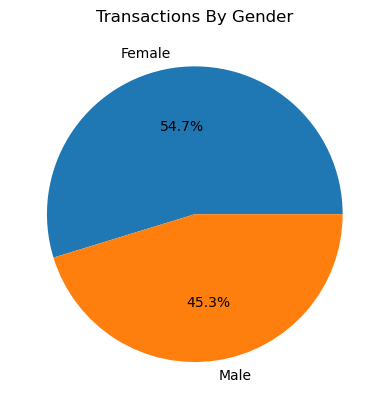

In [59]:
plt.title('Transactions By Gender')
plt.pie(card_transaction_df['gender'].value_counts(),labels=['Female','Male'],autopct='%1.1f%%')
plt.show()

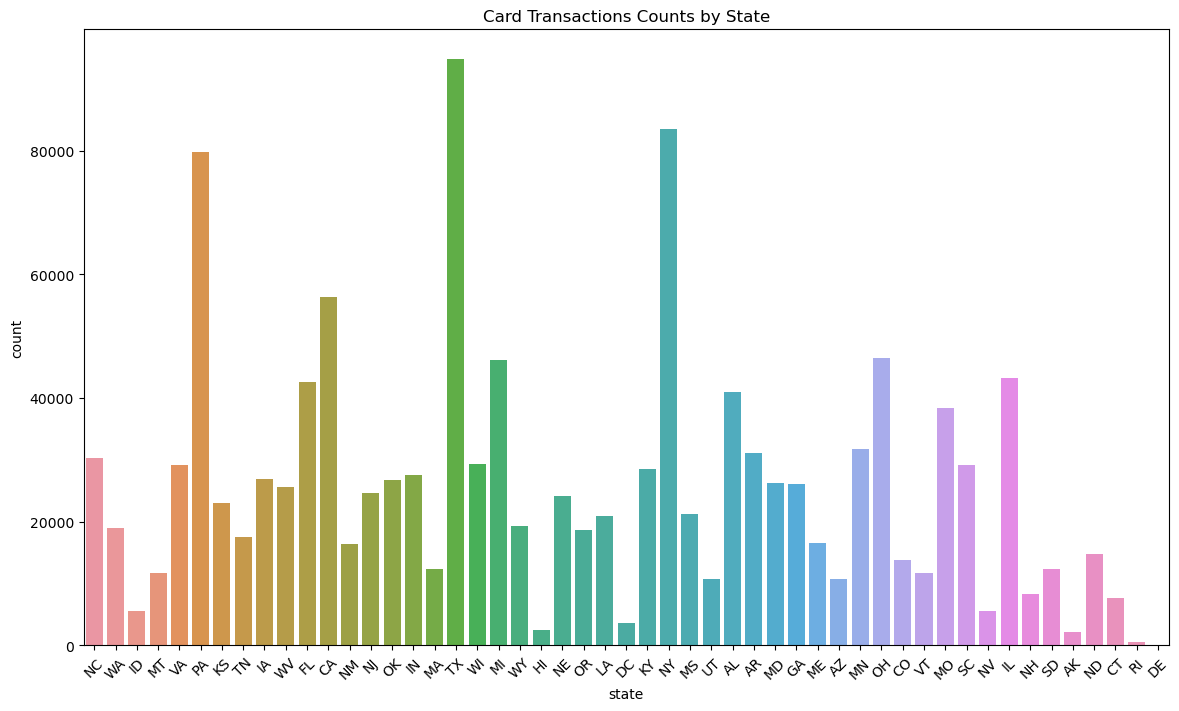

In [54]:
plt.figure(figsize=(14,8))
sns.countplot(card_transaction_df,x='state')
plt.xticks(rotation=45)
plt.title('Card Transactions Counts by State')
plt.show()

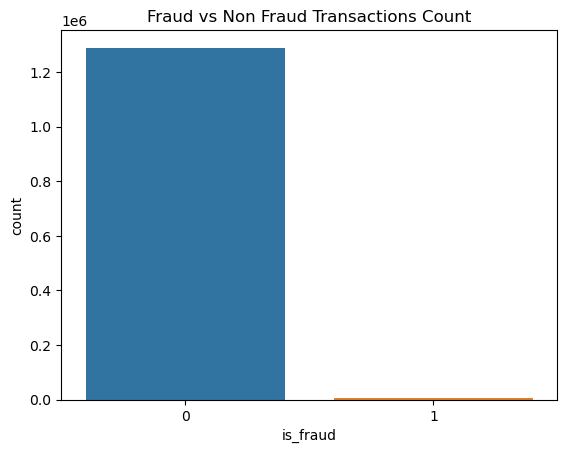

In [82]:
sns.countplot(card_transaction_df,x='is_fraud')
plt.title('Fraud vs Non Fraud Transactions Count')
plt.show() 

#### Multivariate Analysis
Lets do some more analysis comparing with multiple features

<Figure size 1800x800 with 0 Axes>

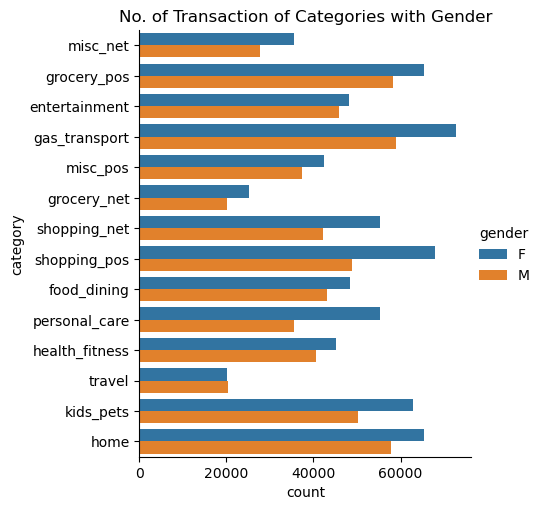

In [95]:
plt.figure(figsize=(18,8))
sns.catplot(data=card_transaction_df,y='category',kind='count',hue='gender')
plt.title('No. of Transaction of Categories with Gender')
plt.show()

In [117]:
# create a fraud transactions dataframe to analyze multivariate analysis
fraud_transactions_df = card_transaction_df.query("is_fraud == 1")

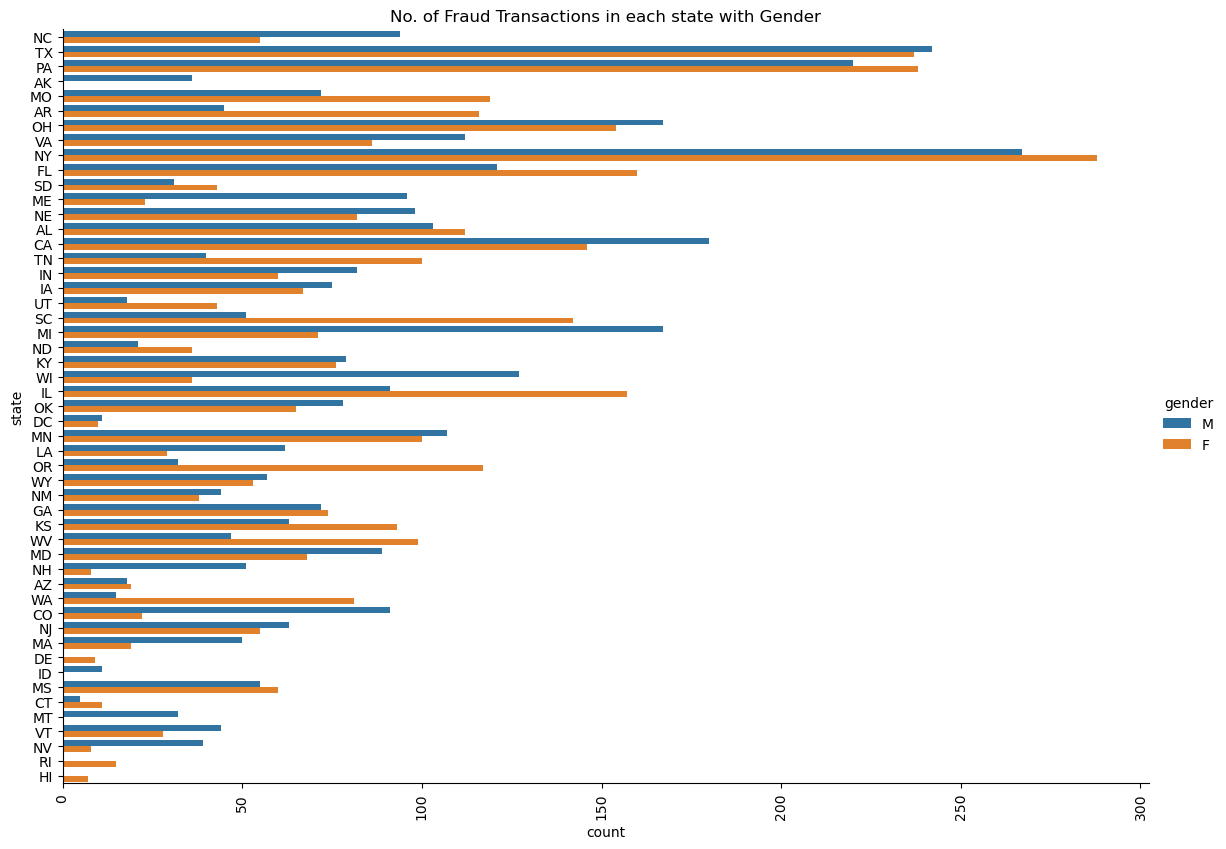

In [116]:
sns.catplot(data=fraud_transactions_df,y='state',kind='count',hue='gender',height=8.27, aspect=11.7/8.27)
plt.title('No. of Fraud Transactions in each state with Gender')
plt.xticks(rotation=90)
plt.show()

<Figure size 1800x800 with 0 Axes>

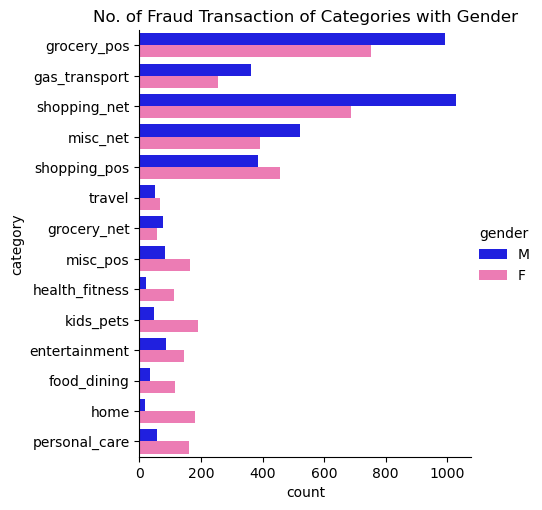

In [131]:
plt.figure(figsize=(18,8))
sns.catplot(data=fraud_transactions_df,y='category',kind='count',hue='gender',palette=['blue','hotpink'])
plt.title('No. of Fraud Transaction of Categories with Gender')
plt.show()

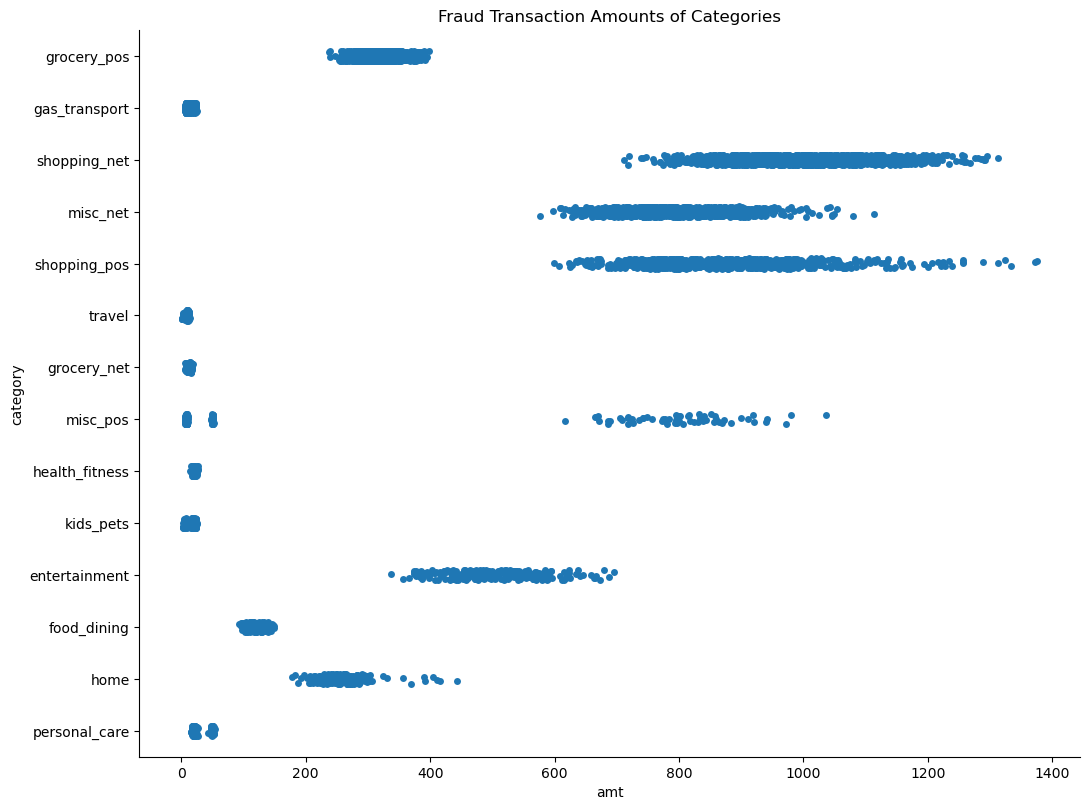

In [153]:
sns.catplot(data=fraud_transactions_df,y='category',x='amt',height=8, aspect=11/8)
plt.title('Fraud Transaction Amounts of Categories')
plt.show()

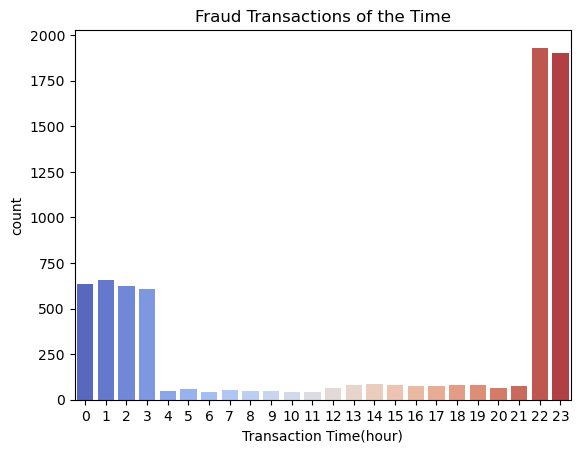

In [180]:
# convert the transaction date time into buckets of the day

sns.countplot(data=fraud_transactions_df,x=pd.to_datetime(fraud_transactions_df['trans_date_trans_time'],format="%Y-%m-%d %H:%M:%S").dt.hour,
              palette="coolwarm").set_title('Fraud Transactions of the Time')
plt.xlabel('Transaction Time(hour)')
plt.show()

In [200]:
fig = px.scatter_mapbox(data_frame=fraud_transactions_df,hover_name='state',lat='lat',lon='long',zoom=4,mapbox_style='open-street-map',text='state')
fig.update_layout(margin={'r':0,'l':0,'t':0,'b':0})
fig.show()

In [9]:
X = card_transaction_df.drop('Class',axis=1)
y = card_transaction_df['Class']

X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.3,random_state=42)

KeyError: "['Class'] not found in axis"

In [ ]:
lgr = LogisticRegression().fit(X_train,y_train)
lgr.score(X_test,y_test)

0.9989817773252344

In [ ]:
def plot_confusion_matrix(gs, title): 
    cm = confusion_matrix(y_test,gs.predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gs.classes_)
    disp.plot()
    disp.ax_.set_title(title)

In [ ]:
params = {}
gs = GridSearchCV(lgr,param_grid=params).fit(X_train,y_train)

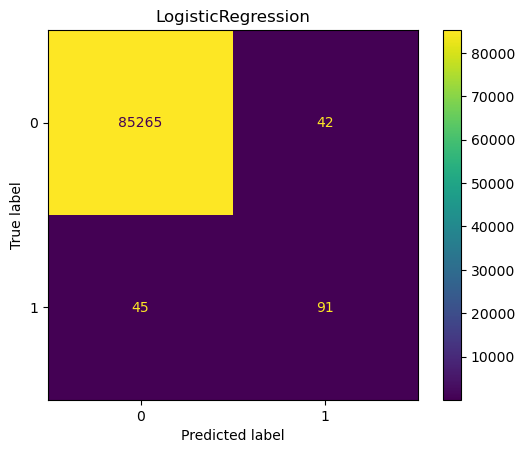

In [ ]:
plot_confusion_matrix(gs,'LogisticRegression')

In [ ]:
rfc = RandomForestClassifier(n_jobs=-1).fit(X_train,y_train)

In [ ]:

rgs = GridSearchCV(rfc,param_grid=params).fit(X_train,y_train)

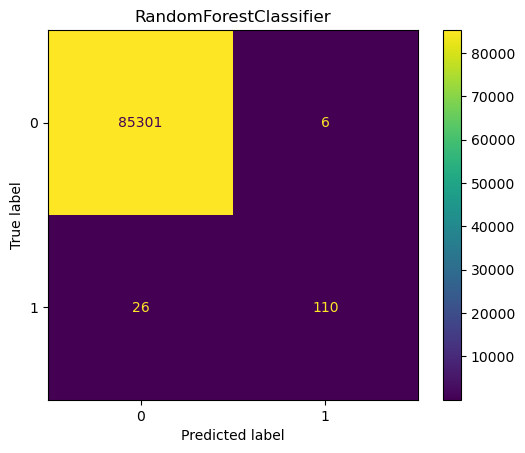

In [ ]:
plot_confusion_matrix(rgs,'RandomForestClassifier')